 - **Authors**: Elliott Sales de Andrade
 - **Research field**: Seismology
 - **Lesson topic**: cartography, maps, projections, Python
 - **Lesson content URL**: https://github.com/UofTCoders/studyGroup/tree/gh-pages/lessons/python/cartography


In [1]:
# Default imports
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt

## Setup
We will be using Cartopy for this lesson, so let's import that.
The common convention is to import it as follows:

In [2]:
import cartopy.crs as ccrs

Let's start with a simple plot of points:

<IPython.core.display.Javascript object>


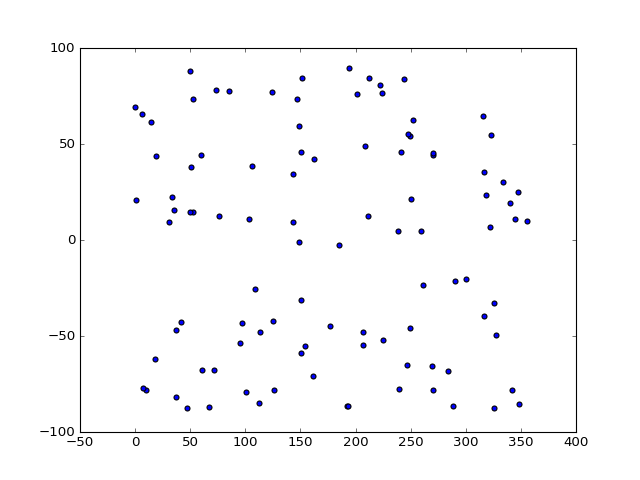

In [3]:
np.random.seed(1)
x = 360 * np.random.rand(100)
y = 180 * np.random.rand(100) - 90

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)

Why pick $x$ values between 0 and 360, and $y$ values between -90 and 90?
Because that corresponds to the ranges for longitudes and latitudes!
Let's rename them.

In [4]:
lon = x
lat = y

## Projections

The first problem with mapping is deciding in what projection to create the map.
Some interesting properties you may want in a map are:

 * Conformal: Preserves angles locally, implying that locally shapes are not distorted.
 * Equal Area: Areas are conserved.
 * Compromise: Neither conformal nor equal-area, but a balance intended to reduce overall distortion.
 * Equidistant: All distances from one (or two) points are correct. Other equidistant properties are mentioned in the notes.
 * Gnomonic: All great circles are straight lines.

See the [Wikipedia list of projections](https://en.wikipedia.org/wiki/List_of_map_projections#Properties)
for more information.

Cartopy has [several options available](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html).
We will start with the very straightforward [Plate Carrée](https://en.wikipedia.org/wiki/Equirectangular_projection)
(also known as Equirectangular or Equidistant Cylindrical.)
We pass an instance of the projection class to the `projection` keyword
argument of `Figure.add_subplot` to signify the projection in which the
resulting map will be made.

<IPython.core.display.Javascript object>


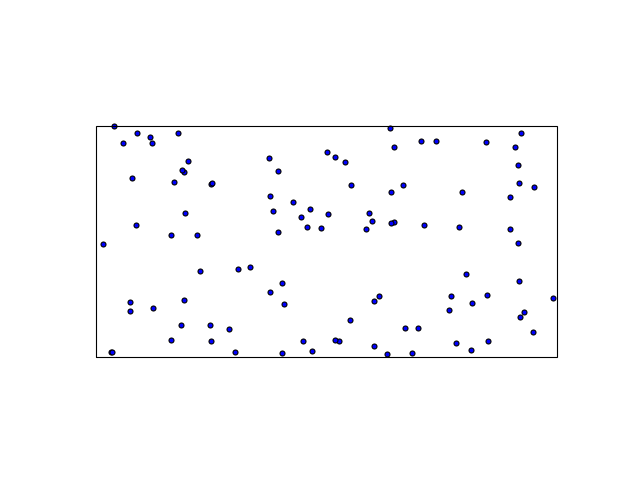

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(lon, lat)

## Adding elements

So far so good; let's add some coast lines:

<IPython.core.display.Javascript object>


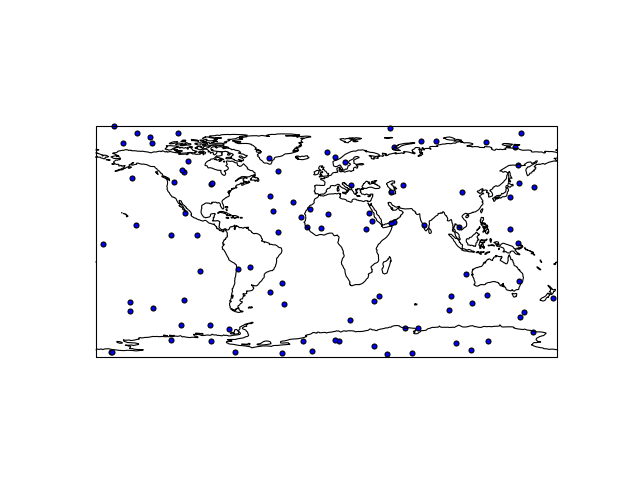

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()

Or how about a land/ocean image:

<IPython.core.display.Javascript object>


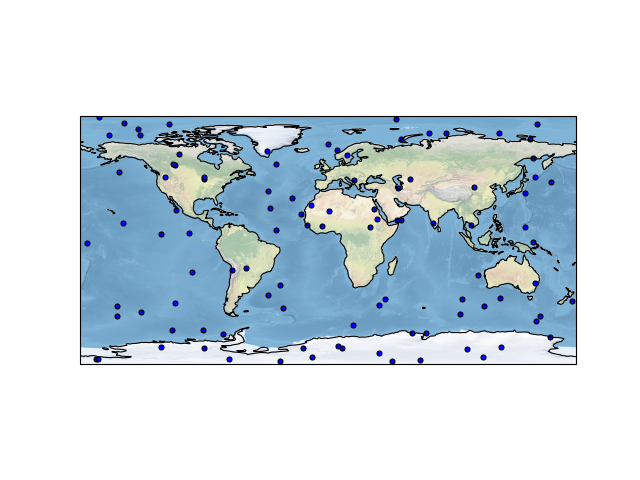

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.stock_img()
ax.coastlines()

And maybe some grid lines:

<IPython.core.display.Javascript object>


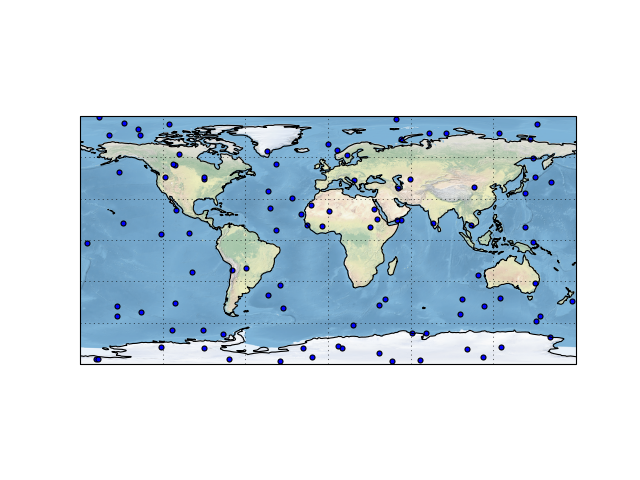

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.stock_img()
ax.coastlines()
ax.gridlines()

This projection supports two arguments:

In [9]:
ccrs.PlateCarree?

<IPython.core.display.Javascript object>


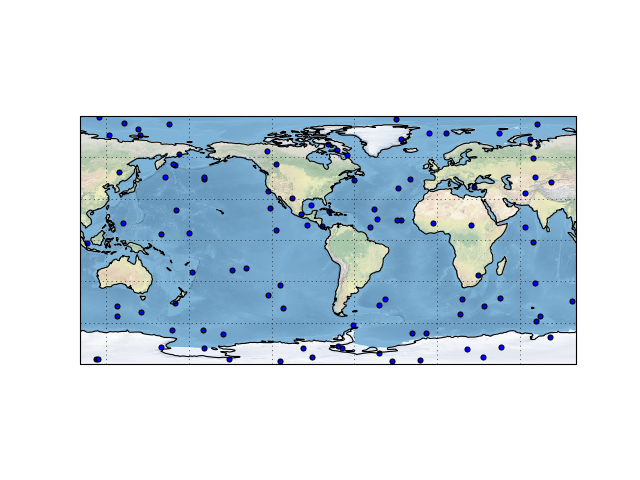

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree(central_longitude=-79))
ax.scatter(lon, lat)
ax.stock_img()
ax.coastlines()
ax.gridlines()

## Other projections

Let's try out a different projection now, say
[Azimuthal Equidistant](https://en.wikipedia.org/wiki/Azimuthal_equidistant_projection).
It preserves angles and distances from the centre of the map.
We'll centre it on this building, 43.660924°N, 79.398329°W.

<IPython.core.display.Javascript object>


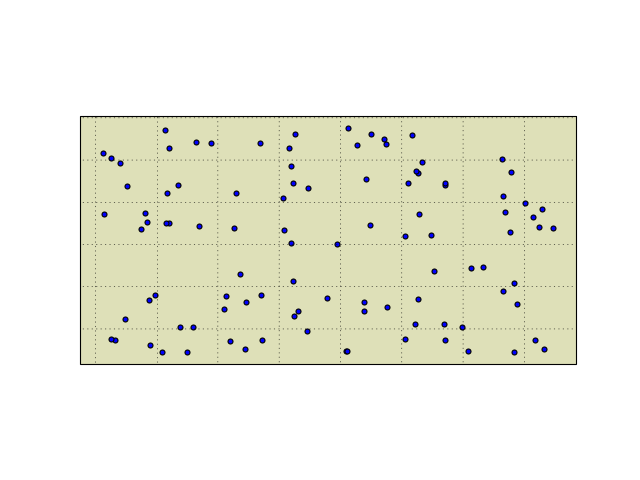

In [11]:
to_lon = -79.398329  # East is positive.
to_lat = 43.660924

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.AzimuthalEquidistant(central_longitude=to_lon,
                                                          central_latitude=to_lat))
ax.scatter(lon, lat)
ax.stock_img()
ax.coastlines()
ax.gridlines()

Hmm, what happened? Our points should be all over the globe. Actually, if
you look at the previous plot, even though we changed the central longitude,
the points never moved either!

This is a common trap with Cartopy, but it's also one of its most useful
features. We neglected to specify the projection in which the scatter points
originated, thus it was plotted in the map coordinates. Map coordinates are
almost always specified in metres (except for Plate Carrée) and since our
points are in degrees, they are _extremely_ small (the circumference is
approximately 40,000 _km_.)

We can specify the input projection using the `transform=` keyword argument
to `ax.scatter`. In this case, we use the Geodetic projection for the points.
This projection is basically longitude/latitude.

<IPython.core.display.Javascript object>


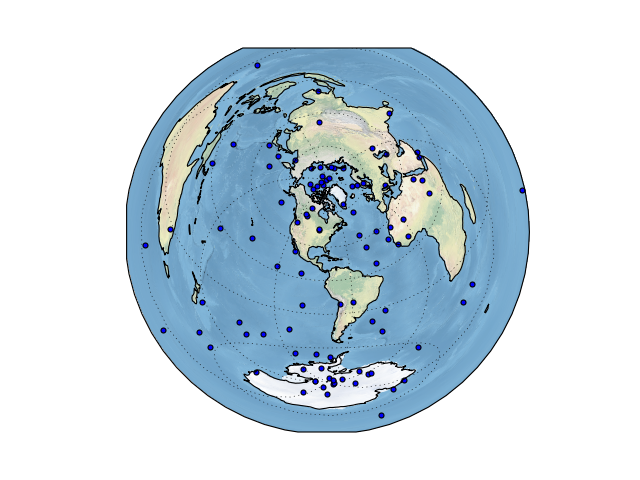

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.AzimuthalEquidistant(central_longitude=to_lon,
                                                          central_latitude=to_lat))
# Here we add the transform argument and use the Geodetic projection.
ax.scatter(lon, lat, transform=ccrs.Geodetic())
ax.stock_img()
ax.coastlines()
ax.gridlines()

What's the difference between Plate Carrée and Geodetic?
Let's look at a map:

<IPython.core.display.Javascript object>


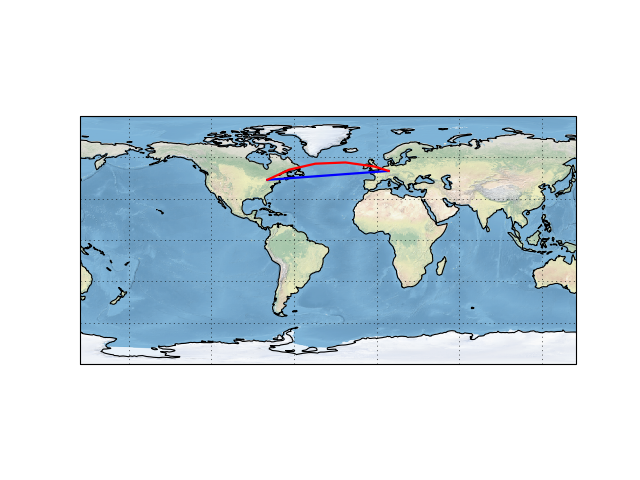

In [13]:
ff_lon = 8 + 41 / 60
ff_lat = 50 + 7 / 60

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree(central_longitude=(to_lon + ff_lon) / 2))
ax.plot([to_lon, ff_lon], [to_lat, ff_lat], c='b', lw=2,
        transform=ccrs.PlateCarree())
ax.plot([to_lon, ff_lon], [to_lat, ff_lat], c='r', lw=2,
        transform=ccrs.Geodetic())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.gridlines()

As you can see, Plate Carrée uses the straight-line path on a longitude/latitude basis,
while Geodetic uses the shortest path in a spherical sense (the
[geodesic](https://en.wikipedia.org/wiki/Geodesic).)

## Features

Let's focus in on Canada for a bit to see what features Cartopy can depict.
We'll switch to the
[Lambert Conformal Conic projection](https://en.wikipedia.org/wiki/Lambert_conformal_conic_projection)
which works well for this size and range of the map, and is recommended by StatsCan.
We'll use their recommended standard parallels (see wiki link for explanation) of
49°N and 77°N, and a central longitude of 91°52'W. The boundaries are arbitrarily
chosen to be 63°W to 123°W and 37°N to 75°N, and set with `ax.set_extent`.

<IPython.core.display.Javascript object>


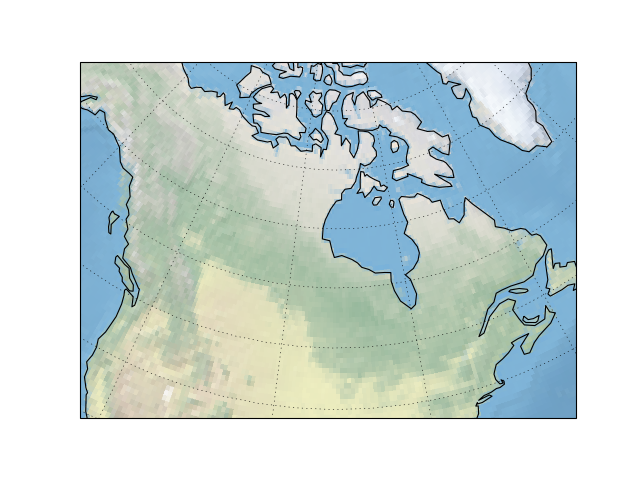

In [14]:
# An arbitrary choice.
canada_east = -63
canada_west = -123
canada_north = 75
canada_south = 37

standard_parallels = (49, 77)
central_longitude = -(91 + 52 / 60)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.stock_img()
ax.coastlines()
ax.gridlines()

Here we can see two things:

  1. The stock image and coastlines are not very high resolution.
  2. The coastlines only show the oceanic coast; no lakes or rivers, and certainly no countries.

Cartopy provides various "features" that can provide some or all of this content
at varying resolutions. Some simple shortcuts to [Natural Earth data](http://www.naturalearthdata.com/)
are provided in the `cartopy.feature` module and can be added via `ax.add_feature`.
These are downloaded and cached on the fly, so there may be some issues if the
WiFi is being flaky in MP408.

In [15]:
import cartopy.feature as cfeature

<IPython.core.display.Javascript object>


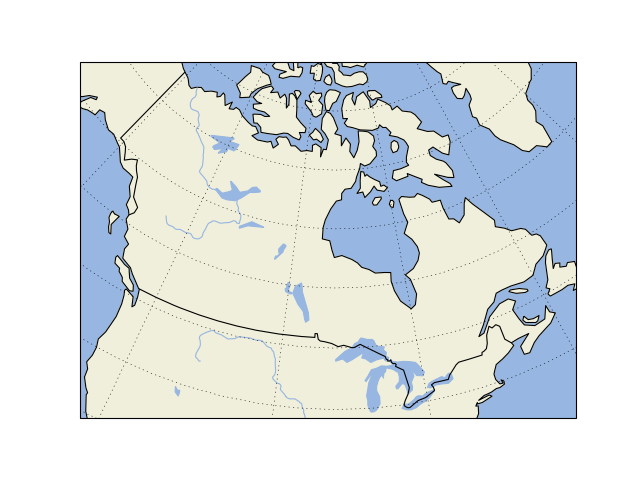

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.gridlines()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)

These are all defined on the 1:110m(illion) scale, but what if we want
something a bit higher resolution? Well, the above were just shortcuts
and we can use `cfeature.NaturalEarthFeature` directly with its
`scale` argument.

<IPython.core.display.Javascript object>


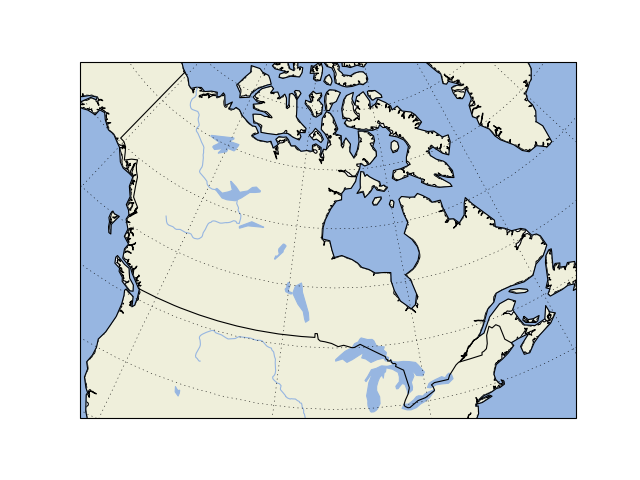

In [17]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.gridlines()
ax.add_feature(land_50m)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)

Now, let's add the provinces and states (the possible names as used here
can be determined by visiting the link above):

<IPython.core.display.Javascript object>


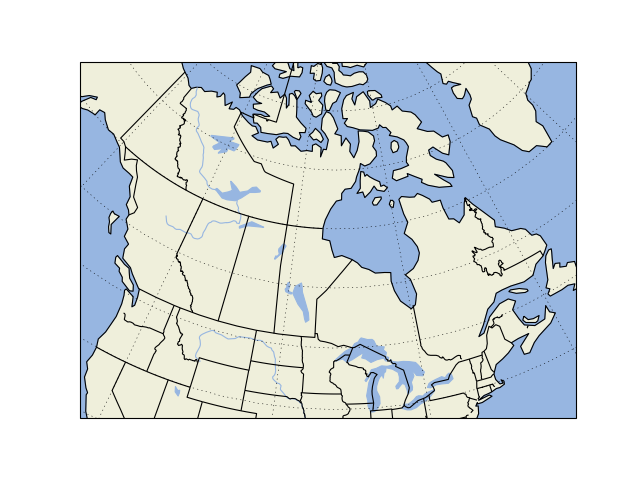

In [18]:
provinces_50m = cfeature.NaturalEarthFeature('cultural',
                                             'admin_1_states_provinces_lines',
                                             '50m',
                                             facecolor='none')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.gridlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(provinces_50m)


## Web Services

Web Map Services (WMS) provide vector data as a download via some
web API and Web Map Tile Services provide raster data via a similar
interface.

These can be added by `ax.add_wms` and `ax.add_wmts`.

<IPython.core.display.Javascript object>


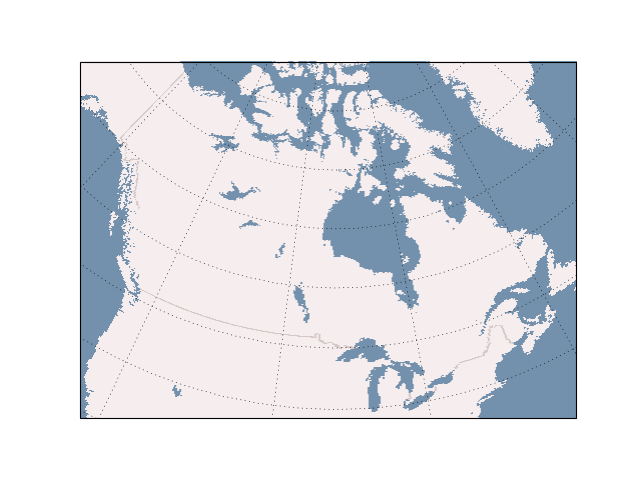

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.gridlines()

ax.add_wms(wms='http://vmap0.tiles.osgeo.org/wms/vmap0',
           layers=['basic'])

Unfortunately, WMTS doesn't support reprojection in 0.14, but it will
in the next release 0.15, so we need to use Plate Carrée for this map.

<IPython.core.display.Javascript object>


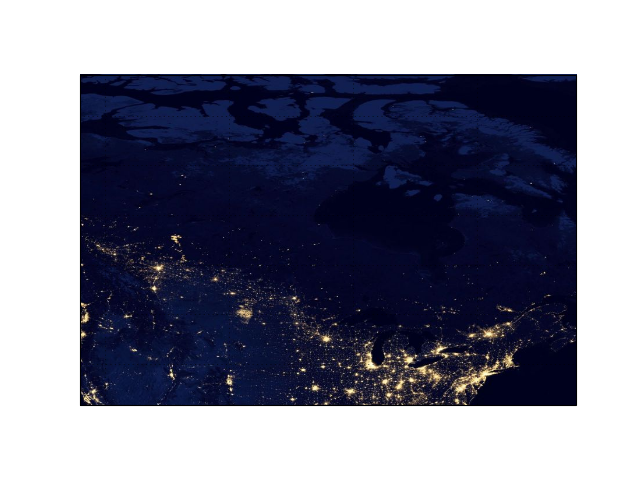

In [20]:
url = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer = 'VIIRS_CityLights_2012'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.gridlines()
ax.add_wmts(url, layer)

## Shapefile I/O

What about outlines that you provide yourself? You might obtain a
shapefile from somewhere outlining something. These can be read
with `cartopy.io.shapereader.Reader`.

In [21]:
from cartopy.io.shapereader import Reader

We will use the data files provided with the lesson here:

In [22]:
data = Reader('icitw_wgs84')

<IPython.core.display.Javascript object>


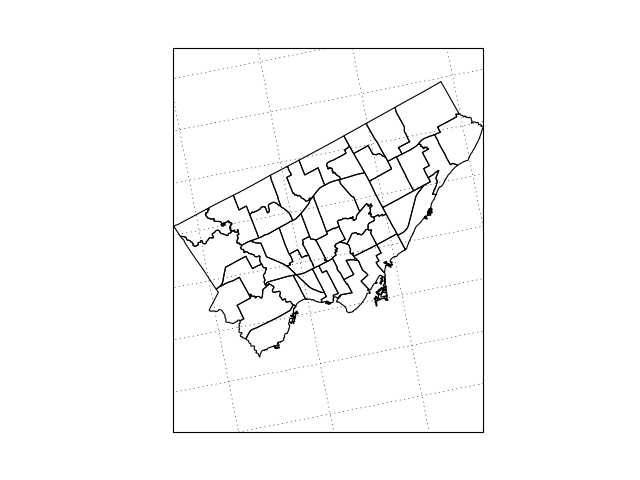

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([-79.6, -79.2, 43.5, 43.9])
ax.gridlines()

ax.add_geometries(data.geometries(), crs=ccrs.Geodetic(), edgecolor='k', facecolor='none')

In case you do not recognize the shapes, these are wards for the city of Toronto.

Each of those geometries is a [shapely](http://toblerity.org/shapely/) object,
on which we can do things like determine if points are contained. We won't
really go into any details of it here, though. The example below is just a
quick one-off to show how it might be used.

In [24]:
import shapely.geometry as sgeom

In [25]:
ward = next(data.geometries())

us = sgeom.Point(to_lon, to_lat)
ward.contains(us)

False

<IPython.core.display.Javascript object>


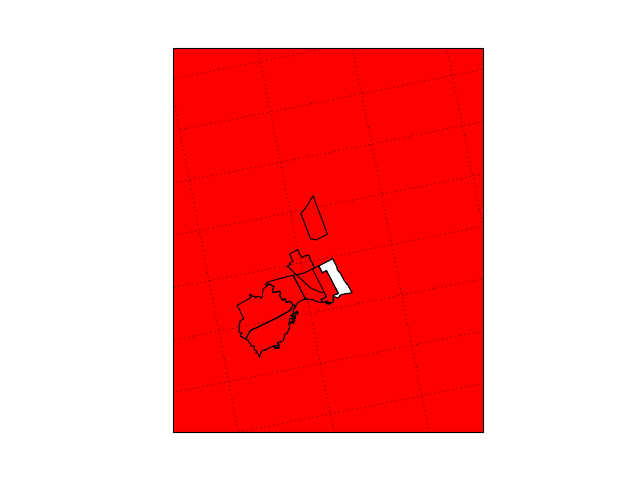

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([-79.6, -79.2, 43.5, 43.9])
ax.gridlines()

for ward in data.geometries():
    if ward.contains(us):
        our_ward = ward
        ax.add_geometries(our_ward, crs=ccrs.Geodetic(), edgecolor='k', facecolor='r')
    else:
        ax.add_geometries(ward, crs=ccrs.Geodetic(), edgecolor='k', facecolor='none')

What happened here? It turns out that the ward data is a bit buggy,
and each ward is _not_ a closed polygon.

In [27]:
our_ward.is_closed

False

Shapely will nicely render its contents in a notebook:

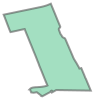

In [28]:
our_ward

The type can be found from the `geom_type` property:

In [29]:
our_ward.geom_type

'MultiPolygon'

`MultiPolygon` contains multiple polygons, but fortunately, there's just the one.

In [30]:
len(our_ward)

1

We'll construct a "linear ring" (basically a closed shape) from
the data in the first polygon.

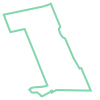

In [31]:
sgeom.LinearRing(our_ward[0].exterior.coords)

And if we use that in our plot, the fill colour will no longer "spill" out
over the rest of the map.

<IPython.core.display.Javascript object>


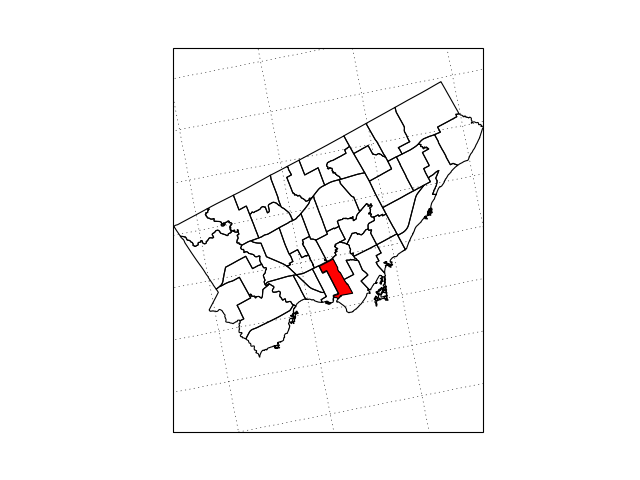

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([-79.6, -79.2, 43.5, 43.9])
ax.gridlines()

for ward in data.geometries():
    if ward.contains(us):
        # Close the polygon...
        our_ward = [sgeom.LinearRing(ward.geoms[0].exterior.coords)]
        ax.add_geometries(our_ward, crs=ccrs.Geodetic(), edgecolor='k', facecolor='r')
    else:
        ax.add_geometries(ward, crs=ccrs.Geodetic(), edgecolor='k', facecolor='none')

## Other links

* [proj.4](https://trac.osgeo.org/proj/)
* [Geopandas](http://geopandas.org/)
* [Folium](https://folium.readthedocs.io/)
